In [1]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("test.nc")
ds

<xarray.Dataset>
Dimensions:   (var: 20, ics: 51, latitude: 720, longitude: 1440)
Coordinates:
    variable  (var) object ...
Dimensions without coordinates: var, ics, latitude, longitude
Data variables:
    u10       (ics, var, latitude, longitude) float32 ...

In [3]:
base = xr.open_dataset("../../data/out_of_sample/2022.h5")
base

<xarray.Dataset>
Dimensions:  (phony_dim_0: 1460, phony_dim_1: 20, phony_dim_2: 721,
              phony_dim_3: 1440)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3
Data variables:
    fields   (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3) float32 ...

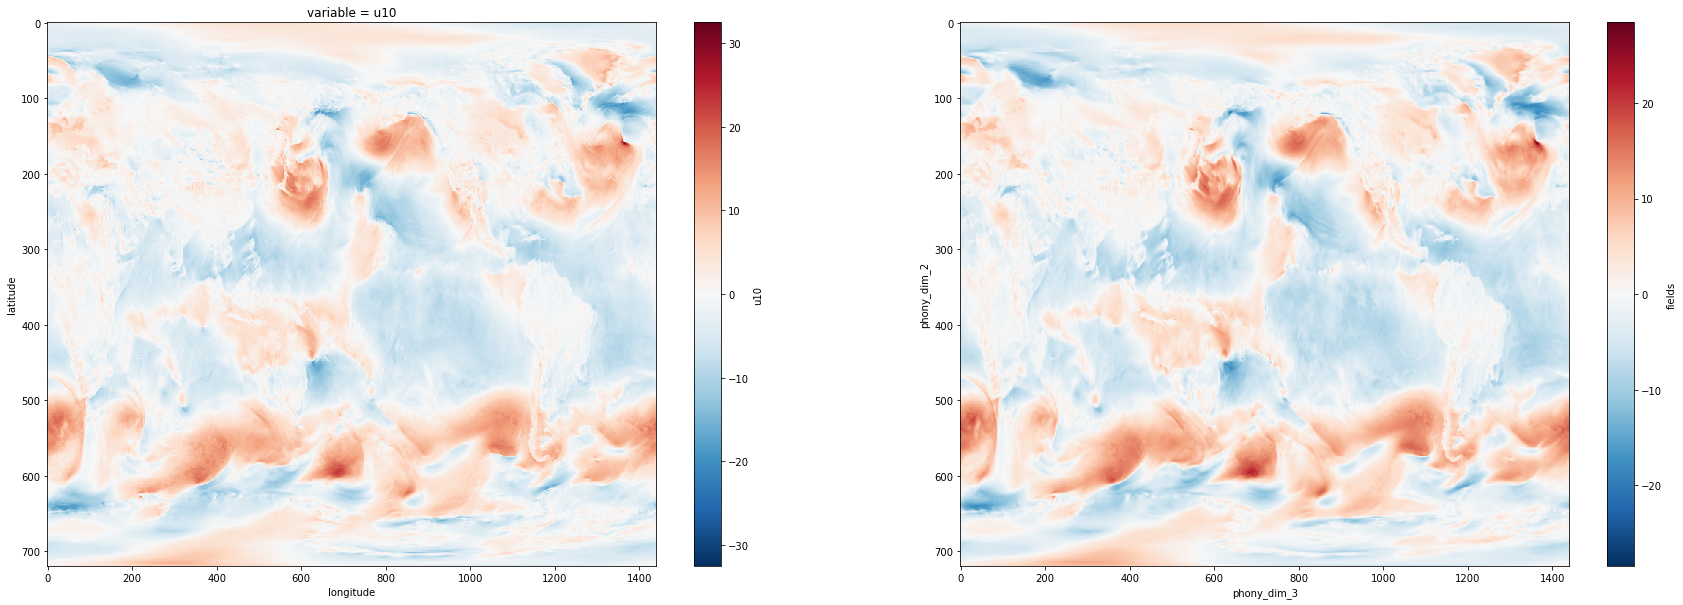

In [10]:
fig, axs = plt.subplots(1,2, figsize = (30,10))
var = 0
ds.u10[50,var].plot(yincrease = False, ax = axs[0])
base.fields.isel(phony_dim_0 = 0, phony_dim_1 = var, phony_dim_2 = slice(0,720)).plot(yincrease = False, ax = axs[1])

In [11]:
test = base.fields.isel(phony_dim_0 = 0, phony_dim_1 = var, phony_dim_2 = slice(0,720)).data - ds.u10[50,var]

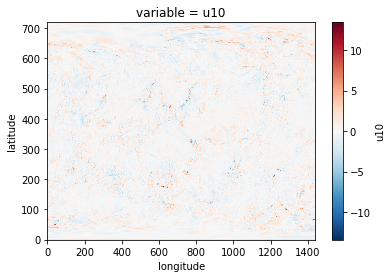

In [12]:
test.plot()

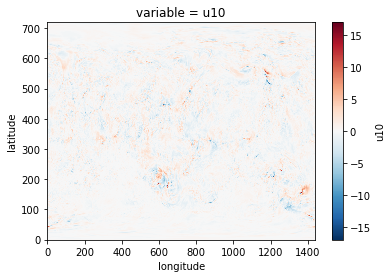

In [14]:
test2 = ds.u10[0,var]- ds.u10[5,var]
test2.plot()